Open and check data.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [117]:
train = pd.read_csv('datasets/gold_recovery_train.csv')
test = pd.read_csv('datasets/gold_recovery_test.csv')
full = pd.read_csv('datasets/gold_recovery_full.csv')

In [118]:
full.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

In [119]:
#train.info()

- Calculate recovery

In [120]:
C = train['rougher.output.concentrate_au']
F= train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
feature_recovery = train['rougher.output.recovery']

In [121]:
R = ((C * (F - T)) / (F * (C - T))) * 100

In [122]:
R.head(), feature_recovery.head()

(0    87.107763
 1    86.843261
 2    86.842308
 3    87.226430
 4    86.688794
 dtype: float64,
 0    87.107763
 1    86.843261
 2    86.842308
 3    87.226430
 4    86.688794
 Name: rougher.output.recovery, dtype: float64)

In [123]:
mae = np.sum(np.abs(R - feature_recovery)) / len(feature_recovery)

In [124]:
mae

8.00350954615662e-15

**The recovery was calculated correctly since the MAE is a low value.**

- Features not available in the test set:
    - What are these parameters?
    - What is their type?

In [125]:
#train.info()

In [126]:
train_cols = list(train.columns)
test_cols = list(test.columns)

In [127]:
non_test_cols = []
for i in train_cols:
    if i not in test_cols:
        non_test_cols.append(i)

In [128]:
print(len(train_cols))
print(len(test_cols))
len(non_test_cols)

87
53


34

In [129]:
non_test_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**The features not available in the test set are product parameters and calculation characteristics of all the stages. They are float types.**

- Data preprocessing

I will drop all the columns from the trained data that are not in the test data.

In [140]:
#test.isnull().sum()

In [143]:
test.shape

(5856, 53)

In [134]:
train.fillna(method='ffill', inplace=True)

In [138]:
test.fillna(method='ffill', inplace=True)

In [ ]:
#check for duplicates

In [141]:
train.duplicated().sum()

0

In [142]:
test.duplicated().sum()

0

In [ ]:
#train.drop(non_test_cols, axis=1, inplace=True)

In [ ]:
#train.info()

In [144]:
#train['primary_cleaner.output.concentrate_au'].mean()

29.04178611284153

In [145]:
#train['primary_cleaner.output.concentrate_ag'].mean()

7.390584868840604

In [146]:
#train['primary_cleaner.output.concentrate_pb'].mean()

8.493673483928095

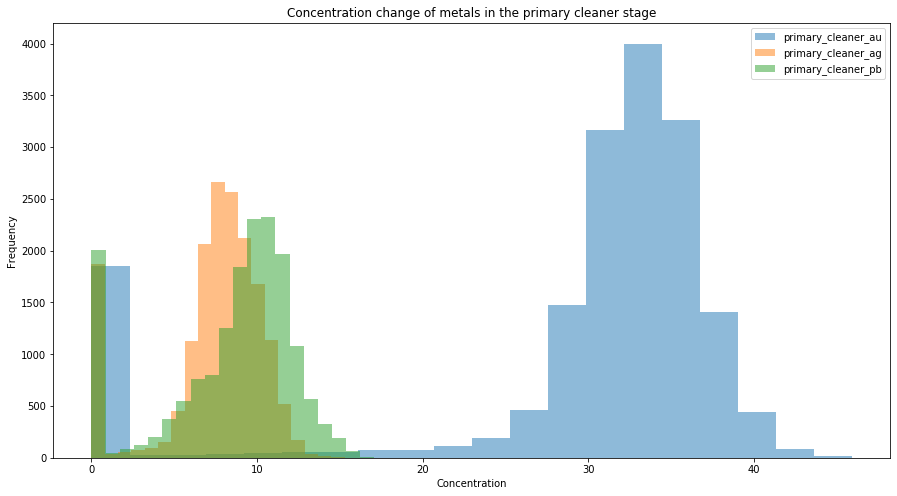

In [184]:
x1 = train['primary_cleaner.output.concentrate_au']
x2 = train['primary_cleaner.output.concentrate_ag']
x3 = train['primary_cleaner.output.concentrate_pb']

kwargs = dict(histtype='stepfilled', alpha=0.5, bins=20)

plt.figure(figsize=(15,8))
plt.hist(x1, **kwargs, label='primary_cleaner_au')
plt.hist(x2, **kwargs, label='primary_cleaner_ag')
plt.hist(x3, **kwargs, label='primary_cleaner_pb')
plt.title('Concentration change of metals in the primary cleaner stage')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend();

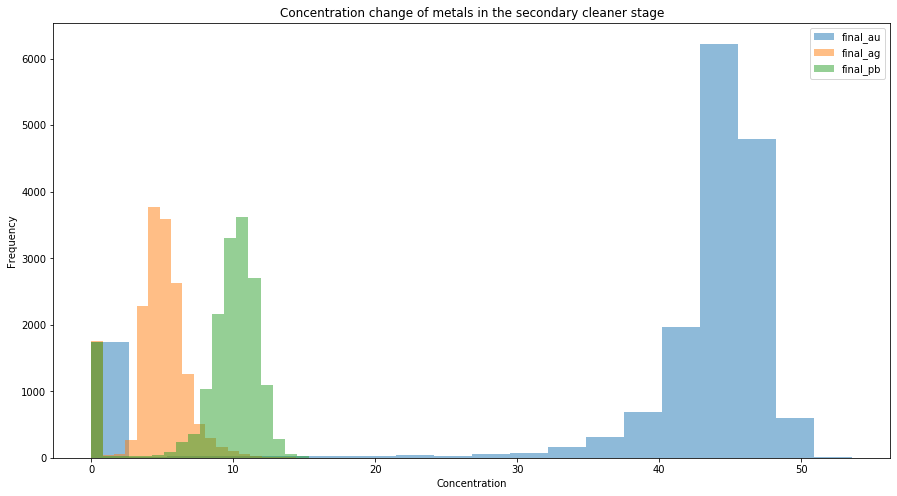

In [185]:
x1 = train['final.output.concentrate_au']
x2 = train['final.output.concentrate_ag']
x3 = train['final.output.concentrate_pb']

kwargs = dict(histtype='stepfilled', alpha=0.5, bins=20)

plt.figure(figsize=(15,8))
plt.hist(x1, **kwargs, label='final_au')
plt.hist(x2, **kwargs, label='final_ag')
plt.hist(x3, **kwargs, label='final_pb')
plt.title('Concentration change of metals in the secondary cleaner stage')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend();

**The concentrations of metals (Au, Ag, Pb) increased from the primay to the secondary purification stages.**